# hydronetworks

In [1]:
import geopandas as gpd
import pyproj
from pathlib import Path
import matplotlib.pyplot as plt
from hydronetworks import HydroNetworks
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

## 1. Specify file paths

In [6]:
in_path = Path('test_data')
out_path = Path('test_output')

admin_path = in_path / "pastaza.gpkg"
rivers_path = in_path / 'pastaza_HydroRIVERS_10v.gpkg'
dem_path = in_path / 'cond_dem.tif'
flow_path = in_path / 'qmean.tif'
flowacc_path = in_path / 'accflow.tif'

#### Define init coordinate system for gpkg (if missing)

In [12]:
# Importing admin layer as geodf
admin_gdf = gpd.read_file(admin_path , layer='pastaza')
river_gdf = gpd.read_file(rivers_path , layer='pastaza_HydroRIVERS_10v')

# adding reference coordinate system in case missing
admin_gdf.crs = {'init': 'epsg:4326'}  
river_gdf.crs = {'init': 'epsg:4326'}  

# Export back
admin_gdf.to_file(in_path / "pastaza.gpkg", driver="GPKG")
river_gdf.to_file(in_path / "pastaza_HydroRIVERS_10v.gpkg", driver="GPKG")

## 2. Read in all the necessary files
And do some quick sanity checks

In [13]:
net = HydroNetworks(rivers_path=rivers_path,
                    dem_path=dem_path,
                    flow_path=flow_path,
                    flowacc_path=flowacc_path)
net.load_files()

RuntimeError: b'no arguments in initialization list'

In [ ]:
print('Global Streamflow dataset')
plt.imshow(net.flow.read(1))
plt.show()

DEM


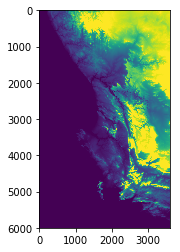

In [5]:
print('DEM')
plt.imshow(net.dem.read(1), vmin=0, vmax=1000)
plt.show()

Rivers with 47 segments


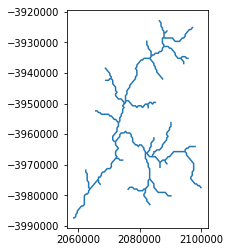

In [6]:
print('Rivers with', len(net.rivers), 'segments')
net.rivers.plot()
plt.show()

## 2. Process network and attributes
These will be the main data structures for holding the river network, and the nodes where rivers join

In [7]:
net.create_network()

Created network and nodes


Then calculate Shreve stream order for the network
This allows to easily keep track of what is upstream and downstream

In [8]:
net.assign_streamorder()

Stream ordered


And import elevation, gscd etc for each node

In [9]:
net.load_attributes()

Attributes loaded


Convert to GeoDataFrames

In [10]:
net.network_to_gdf()

Converted!


## 3. Calculate local flow and hydro potential

In [11]:
net.local_flowacc()
net.calculate_hydro()

Calculated hydro potential


## 4. Sanity check and save

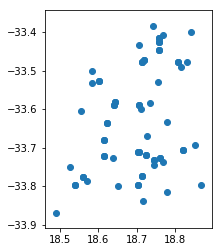

In [12]:
net.nodes_out.plot()

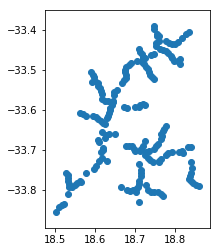

In [13]:
net.hydro_points.plot()

In [14]:
net.save_results(out_path)